In [0]:
#Resimler dosyası google drive linki
# https://drive.google.com/drive/folders/1rF1sCFoGwGxt-RDgYvchL1hcXh8f-SK2?usp=sharing

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
import os, shutil

In [0]:
#sıkıştırılmamış veri kümesinin orjinalinin bulunduğu dizin yolu
original_dataset_dir = './derin_ogrenme/gomlek_ve_corap'
#yapacağımız küçük veri setlerinin dizin yolu
base_dir = './derin_ogrenme/gomlek_ve_corap_small'
os.mkdir(base_dir)

In [0]:
# Train için, Validation için ve Test için klasör oluşturuluyor
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
#Gömlek ve Çorap için eğitim-doğrulama-test dizinlerin
#Çorap resimleri eğitim dizini
train_coraplar_dir = os.path.join(train_dir, 'coraplar')
os.mkdir(train_coraplar_dir)

#Gömlek resimleri eğitim dizini
train_gomlekler_dir = os.path.join(train_dir, 'gomlekler')
os.mkdir(train_gomlekler_dir)

#Çorap resimleri doğrulama dizini
validation_coraplar_dir = os.path.join(validation_dir, 'coraplar')
os.mkdir(validation_coraplar_dir)

#Gömlek resimleri doğrulama dizini
validation_gomlekler_dir = os.path.join(validation_dir, 'gomlekler')
os.mkdir(validation_gomlekler_dir)

#Çorap resimleri test dizini
test_coraplar_dir = os.path.join(test_dir, 'coraplar')
os.mkdir(test_coraplar_dir)

#Gömlek resimleri test dizini
test_gomlekler_dir = os.path.join(test_dir, 'gomlekler')
os.mkdir(test_gomlekler_dir)

In [0]:
#çoraplar train klasör içeriği
# İlk 90 çorap resmini train_coraplar_dir'e kopyala
fnames = ['corap ({}).jpg'.format(i+1) for i in range(90)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_coraplar_dir, fname)
    shutil.copyfile(src, dst)


In [0]:
#çoraplar validation klasör içeriği
# Sonraki 30 çorap resmini validation_coraplar_dir'e kopyala
fnames = ['corap ({}).jpg'.format(i) for i in range(90, 120)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_coraplar_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#çoraplar test klasör içeriği
# Sonraki 30 çorap resmini test_coraplar_dir'e kopyala
fnames = ['corap ({}).jpg'.format(i) for i in range(120, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_coraplar_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#gömlekler train klasör içeriği
# İlk 90 gömlek resmini train_gomlekler_dir'e kopyala
fnames = ['gomlek ({}).jpg'.format(i+1) for i in range(90)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_gomlekler_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#gömlekler validation klasör içeriği
# Sonraki 30 gömlek resmini validation_gomlekler_dir'e kopyala
fnames = ['gomlek ({}).jpg'.format(i) for i in range(90, 120)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_gomlekler_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#gömlekler test klasör içeriği
# Sonraki 30 gömlek resmini test_gomlekler_dir'e kopyala
fnames = ['gomlek ({}).jpg'.format(i) for i in range(120, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_gomlekler_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
print('eğitimde toplam çorap:', len(os.listdir(train_coraplar_dir)))

eğitimde toplam çorap: 90


In [0]:
print('eğitimde toplam gömlek:', len(os.listdir(train_gomlekler_dir)))

eğitimde toplam gömlek: 90


In [0]:
print('doğrulamada toplam çorap:', len(os.listdir(validation_coraplar_dir)))

doğrulamada toplam çorap: 30


In [0]:
print('doğrulamada toplam gömlek:', len(os.listdir(validation_gomlekler_dir)))

doğrulamada toplam gömlek: 30


In [0]:
print('testte toplam çorap:', len(os.listdir(test_coraplar_dir)))

testte toplam çorap: 30


In [0]:
print('testte toplam gömlek:', len(os.listdir(test_gomlekler_dir)))

testte toplam gömlek: 30


In [0]:
#ağımızı oluşturalım
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
#veri ön işleme işlemlerini yapalım
from keras.preprocessing.image import ImageDataGenerator

# Tüm resimler 1./255 ile yeniden ölçeklendirilecek
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Bu hedef dizindir
        train_dir,
        # Tüm resimler 150x150 boyutuna getirilecek
        target_size=(150, 150),
        batch_size=20,
        # Binary_crossentropy kaybını kullandığımız için ikili etiketlere ihtiyacımız var
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 180 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 103s 1s/step - loss: 0.4387 - acc: 0.7895 - val_loss: 0.4770 - val_acc: 0.7970
Epoch 2/30
100/100 [==============================] - 103s 1s/step - loss: 0.1530 - acc: 0.9435 - val_loss: 0.0912 - val_acc: 0.8390
Epoch 3/30
100/100 [==============================] - 103s 1s/step - loss: 0.0581 - acc: 0.9810 - val_loss: 0.4327 - val_acc: 0.8480
Epoch 4/30
100/100 [==============================] - 103s 1s/step - loss: 0.0218 - acc: 0.9960 - val_loss: 0.5851 - val_acc: 0.8660
Epoch 5/30
100/100 [==============================] - 103s 1s/step - loss: 0.0055 - acc: 0.9985 - val_loss: 0.6944 - val_acc: 0.8670
Epoch 6/30
100/100 [==============================] - 103s 1s/step - loss: 0.0036 - acc: 0.9995 - val_loss: 0.2941 - val_acc: 0.8500
Epoch 7/30
100/100 [==============================] - 103s 1s/step - loss: 0.0021 - acc: 0.9990 - val_loss: 1.0285 - val_acc: 0.8660
Epoch 8/30
100/100 [==============================] - 103s 1s/step - 

In [0]:
#modeli kaydedelim
model.save('gomlek_ve_corap_small_1.h5')

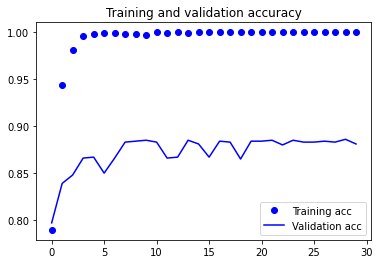

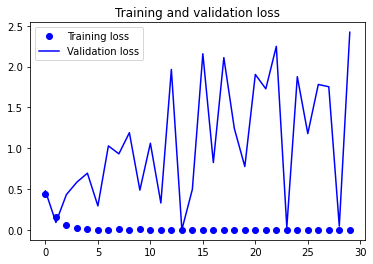

In [0]:
#Eğitim sırasında modelin kayıp ve doğruluğunu eğitim ve doğrulama verileri üzerine çizelim:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# A) İLK ADIM: CNN-maxpol süreci

#ilk olarak yukarıda yapılan işlemler: Verilerimizi train, validation ve test olarak böldük.
#Train olarak ayırdığımız resimlerle eğitimi, validation olarak ayırdığımız resimlerle validasyonu gerçekleştirdik.
#Genellikle epoch sayısı arttıkça kayıplar azalmalıdır ve doğruluk artmalıdır. 
#30 epoch'ta görüldüğü üzere bu durum gerçekleşiyor. Daha sonra bu modeli kaydediyoruz.
#Training and validation accuracy ve Training and alidation loss grafiklerini matplotlib kütüphanesiyle oluşturuyoruz.
#Overfit – Underfit (ezberleme – az öğrenme) incelemesi için de kayıp ve başarı değerlerimize bakalım. 
#Grafiğmiz yukarıdaki gibi oluştu. Modelimizde "overfit" var. Her iki sonuçta da bir tutarsızlık gözlenmektedir
#Epoch sayımız, validation oranı bu durumu etkiler. Biz ilk olarak data augmentation ile eğitim verisi üzerinde işlem yapalım.
#Overfittingi engellemek için veriyi artıracağız. Bu sayede daha iyi eğitim gerçekleşecek.

In [0]:
#veri büyütmeyi kullanma
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

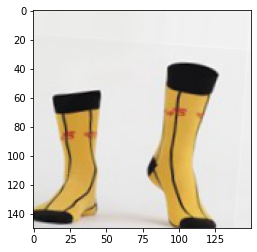

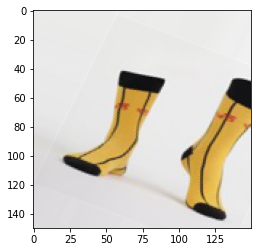

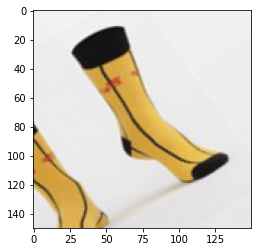

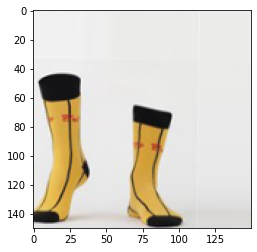

In [0]:
# Bu, görüntü önişleme yardımcı programlarına sahip bir modüldür
from keras.preprocessing import image

fnames = [os.path.join(train_coraplar_dir, fname) for fname in os.listdir(train_coraplar_dir)]

# "Büyütme" için bir resim seçiyoruz
img_path = fnames[3]

#Görüntü okumu ve yeniden boyutandırma
img = image.load_img(img_path, target_size=(150, 150))

# Şekli bir Numpy dizisine dönüştür (150, 150, 3)
x = image.img_to_array(img)

# (1, 150, 150, 3) şeklinde yeniden şekillendir
x = x.reshape((1,) + x.shape)

# Aşağıdaki .flow () komutu rastgele dönüştürülmüş görüntü grupları oluşturur.
# Süresiz olarak döngü yapacak, bu yüzden döngüyü bir noktada kırmak gerekiyor!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=3,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=3,
        class_mode='binary')

Found 180 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [0]:
history2 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 22s 222ms/step - loss: 0.0711 - acc: 0.9833 - val_loss: 2.2575e-05 - val_acc: 0.8867
Epoch 2/30
100/100 [==============================] - 22s 220ms/step - loss: 0.0995 - acc: 0.9733 - val_loss: 1.5000e-06 - val_acc: 0.8267
Epoch 3/30
100/100 [==============================] - 22s 219ms/step - loss: 0.0803 - acc: 0.9700 - val_loss: 1.4420e-12 - val_acc: 0.7800
Epoch 4/30
100/100 [==============================] - 22s 220ms/step - loss: 0.0409 - acc: 0.9867 - val_loss: 0.0015 - val_acc: 0.8200
Epoch 5/30
100/100 [==============================] - 22s 223ms/step - loss: 0.0461 - acc: 0.9833 - val_loss: 7.4960e-07 - val_acc: 0.8933
Epoch 6/30
100/100 [==============================] - 22s 220ms/step - loss: 0.0689 - acc: 0.9667 - val_loss: 0.1345 - val_acc: 0.8267
Epoch 7/30
100/100 [==============================] - 22s 220ms/step - loss: 0.0525 - acc: 0.9800 - val_loss: 0.0036 - val_acc: 0.9000
Epoch 8/30
100/100 [===================

In [0]:
model.save('gomlekcorap.h5')

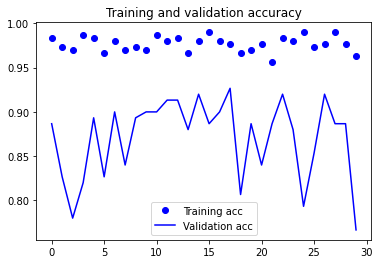

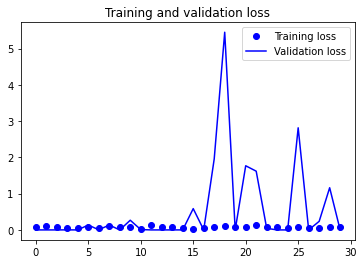

In [0]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# B) İKİNCİ ADIM: DATA AUGMATION YÖNTEMİ İLE DENEY TEKRAR EDİLDİ.
#yeni bir model oluşturduk. Bunun sonucunda modelimizi kaydedip matplotlib 
#kütüphanesini kullandık ve grafikler ürettik.
#İlk ürettiğimiz grafiğe göre kıyasladığımızda daha tutarlı 
#fakat yine de grafiğe bakıldığında hem accuracy'de hem de loss'da sapmalar mevcuttur.
#amacımız eğitimi daha da iyileştirmekti. Bir önceki eğitime göre bu verimi elde ettik.


In [0]:
#DROP-OUT ETKİSİ 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout katmanını ekliyoruz.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history3 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 23s 230ms/step - loss: 0.7012 - acc: 0.5267 - val_loss: 0.7985 - val_acc: 0.6267
Epoch 2/30
100/100 [==============================] - 23s 226ms/step - loss: 0.6592 - acc: 0.6200 - val_loss: 0.6742 - val_acc: 0.7200
Epoch 3/30
100/100 [==============================] - 23s 227ms/step - loss: 0.5653 - acc: 0.7467 - val_loss: 0.5783 - val_acc: 0.7200
Epoch 4/30
100/100 [==============================] - 22s 224ms/step - loss: 0.5198 - acc: 0.7467 - val_loss: 0.0783 - val_acc: 0.8400
Epoch 5/30
100/100 [==============================] - 23s 225ms/step - loss: 0.4478 - acc: 0.7867 - val_loss: 0.4813 - val_acc: 0.8467
Epoch 6/30
100/100 [==============================] - 23s 227ms/step - loss: 0.4973 - acc: 0.7867 - val_loss: 0.5998 - val_acc: 0.8067
Epoch 7/30
100/100 [==============================] - 23s 225ms/step - loss: 0.4796 - acc: 0.7767 - val_loss: 1.6402 - val_acc: 0.8067
Epoch 8/30
100/100 [==============================] - 2

In [0]:
model.save('gomlekvecorapdrop.h5')

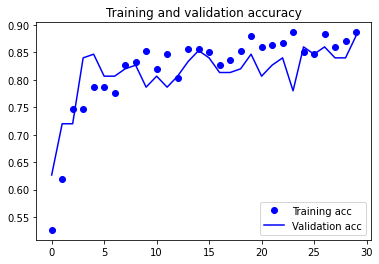

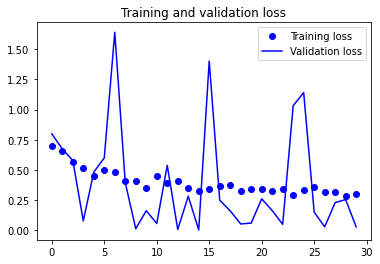

In [0]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# C) ÜÇÜNCÜ ADIM: DROP-OUT İLE DENEY TEKRARLANDI.
#Grafiklerde de görüldüğü üzere drop-out sonucu bir iyileşme bulunmaktadır. 
#Training validation grafiğine baktığımızda eğitim ve doğrulama değerleri  bu eğitim sonucunda birbirlerine daha yakın olmuştur.
#Training and validation loss grafiğine baktığımızda yine bir önceki eğitime göre iyileşme görüyoruz.

In [0]:
#EPOC KESME
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout katmanını ekliyoruz.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history4 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/8
100/100 [==============================] - 23s 228ms/step - loss: 0.6863 - acc: 0.5433 - val_loss: 0.7192 - val_acc: 0.5333
Epoch 2/8
100/100 [==============================] - 23s 225ms/step - loss: 0.6442 - acc: 0.6633 - val_loss: 0.5312 - val_acc: 0.6400
Epoch 3/8
100/100 [==============================] - 22s 223ms/step - loss: 0.5977 - acc: 0.7167 - val_loss: 0.4037 - val_acc: 0.6867
Epoch 4/8
100/100 [==============================] - 22s 224ms/step - loss: 0.5507 - acc: 0.7300 - val_loss: 0.4879 - val_acc: 0.7600
Epoch 5/8
100/100 [==============================] - 23s 225ms/step - loss: 0.4938 - acc: 0.7767 - val_loss: 0.8023 - val_acc: 0.7400
Epoch 6/8
100/100 [==============================] - 22s 223ms/step - loss: 0.4775 - acc: 0.7700 - val_loss: 0.5311 - val_acc: 0.7533
Epoch 7/8
100/100 [==============================] - 22s 224ms/step - loss: 0.4230 - acc: 0.7833 - val_loss: 0.2202 - val_acc: 0.7733
Epoch 8/8
100/100 [==============================] - 22s 224ms

In [0]:
model.save('GomlekVeGorapEpoch.h5')

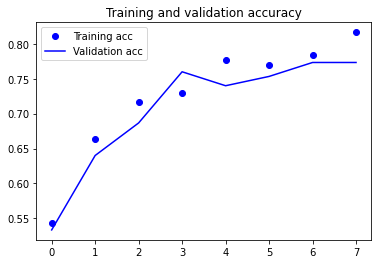

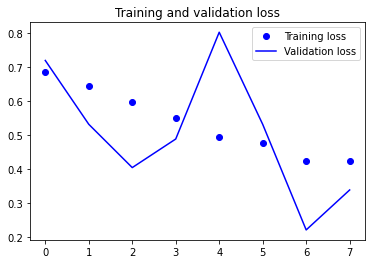

In [0]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# D)ERKEN EPOCH'TA KESME İŞLEMİ
#erken kesme işlemi grafiğimizi olumlu etkiledi çünkü accuracy değerleri birbirlerine yakın olduğunu görüyoruz.
#loss değerleri de grafiğe bakıldığında daha ayrı görülmektedir. 
#epoch erken kesme amacımıza yakınlaştırdı. Tabi eğitimde daha iyi sonuçlar için; 
#daha çok veri kullanılmalı, ayrıca ilgili parametre ayarlamaları da yapılabilir.
#Tüm bunlar gerçekleştiğinde sonuçlar daha iyi olacaktır.